# Setup and load variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
thresh = 10**6 # celltype expression threshold

In [3]:
expr = pd.read_csv("../../data/prepared/mouse.tsv.gz", sep="\t", header=0, index_col=[0,1])
print(expr.shape)
# rename the first column to "celltype"
idx = list(expr.index.names)
idx[0] = 'celltype'
expr.index.names = idx
expr

(1313, 31053)


Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
celltype        donor_id                                                       
Astro Aqp4_Gfap F003        47       5        0    3      0        0      83   
                F004        13       1        0    1      0        0      68   
                F005        40       2        0    0      1        0      69   
                F006         2       0        0    0      0        0      12   
                F007         7       0        0    2      0        0      46   
...                        ...     ...      ...  ...    ...      ...     ...   
Vip Sncg        M002       136       4        0    1      0        0       3   
                M003        58       8        0    0      0        0       2   
                M004        66       7        0    0      0        0       0   
                M007        50       2        0    0      0        0       4   
                M008        96      12        0    1      0        0       2   

                          Lypla1  Gm37988  Tcea1  ...  AC125149.1  AC125149.2  \
celltype        donor_id                          ...                           
Astro Aqp4_Gfap F003           1       44     72  ...           0           0   
                F004           0       10     67  ...           0           0   
                F005           4       40     74  ...           0           0   
                F006           0        2     12  ...           0           0   
                F007           3       11     44  ...           0           0   
...                          ...      ...    ...  ...         ...         ...   
Vip Sncg        M002           0        0      4  ...           0           0   
                M003           0        1      2  ...           0           0   
                M004           0        1      1  ...           0           0   
                M007           0        1      2  ...           0           0   
                M008           0        1     12  ...           0           0   

                          AC125149.4  AC234645.1  AC168977.2  AC168977.1  \
celltype        donor_id                                                   
Astro Aqp4_Gfap F003               0           0           0           1   
                F004               0           0           0           0   
                F005               0           0           0           0   
                F006               0           0           0           0   
                F007               0           0           0           0   
...                              ...         ...         ...         ...   
Vip Sncg        M002               0           0           0           0   
                M003               0           0           0           0   
                M004               0           0           0           0   
                M007               0           0           0           0   
                M008               0           0           0           0   

                          AC149090.1  CAAA01118383.1  Vmn2r122  CAAA01147332.1  
celltype        donor_id                                                        
Astro Aqp4_Gfap F003             196              32         0               0  
                F004             113              21         0               1  
                F005             211              26         0               0  
                F006              32               9         0               0  
                F007             129              23         0               0  
...                              ...             ...       ...             ...  
Vip Sncg        M002              18               2         0               0  
                M003               9               3         0               0  
                M004              20               0         0               0  
                M007              11               

# First, filter by celltype

How many celltypes have fewer than $10^6$ reads?

95


(0.0, 10000000.0)

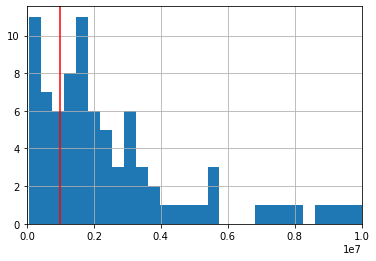

In [4]:
celltype_sum = expr.groupby(level=['celltype']).sum().sum(axis=1)
num_celltypes = (celltype_sum > thresh).sum()
print(num_celltypes)
celltype_sum.hist(bins=1000)
plt.axvline(x=thresh, color='red')
plt.xlim([0, 10**7])

In [5]:
expr = expr.iloc[np.where(celltype_sum > thresh)[0]]
expr.shape

(95, 31053)

# Scale to CPM

In [6]:
cpm = expr + 1
cpm = cpm/cpm.sum()*thresh
cpm

Xkr4       Gm1992      Gm37381          Rp1  \
celltype        donor_id                                                       
Astro Aqp4_Gfap F003       165.922321   241.099413  3289.473684  2737.850787   
                F004        48.394010    80.366471  3289.473684  1368.925394   
                F006        10.370145    40.183236  3289.473684   684.462697   
                F007        27.653720    40.183236  3289.473684  2053.388090   
                F008        31.110435   120.549707  3289.473684  1368.925394   
...                               ...          ...          ...          ...   
L5 ET_3         F008      1890.823113  1567.146187  6578.947368  2737.850787   
                M002      1569.348617  1125.130596  3289.473684  2053.388090   
                M003      1310.094991  1326.046773  3289.473684  4106.776181   
                M006       311.104351   200.916178  3289.473684  1368.925394   
                M008      1517.497891   843.847947  3289.473684   684.462697   

                                Sox17       Gm37323       Mrpl15       Lypla1  \
celltype        donor_id                                                        
Astro Aqp4_Gfap F003       352.236703  10204.081633  4690.117253  4464.285714   
                F004       352.236703  10204.081633  3852.596315  2232.142857   
                F006       352.236703  10204.081633   725.851480  2232.142857   
                F007       352.236703  10204.081633  2624.232272  8928.571429   
                F008       352.236703  10204.081633  5806.811837  4464.285714   
...                               ...           ...          ...          ...   
L5 ET_3         F008       352.236703  10204.081633  2791.736460  4464.285714   
                M002       352.236703  10204.081633  3070.910106  6696.428571   
                M003       352.236703  10204.081633  1730.876605  2232.142857   
                M006       352.236703  10204.081633   837.520938  2232.142857   
                M008      1056.710109  10204.081633  3350.083752  4464.285714   

                               Gm37988        Tcea1  ...    AC125149.1  \
celltype        donor_id                             ...                 
Astro Aqp4_Gfap F003      10116.906475  3967.391304  ...  10526.315789   
                F004       2473.021583  3695.652174  ...  10526.315789   
                F006        674.460432   706.521739  ...  10526.315789   
                F007       2697.841727  2445.652174  ...  10526.315789   
                F008       6519.784173  4728.260870  ...  10526.315789   
...                                ...          ...  ...           ...   
L5 ET_3         F008       1573.741007  1739.130435  ...  10526.315789   
                M002       1798.561151  1847.826087  ...  10526.315789   
                M003       1124.100719  1793.478261  ...  10526.315789   
                M006        899.280576   706.521739  ...  10526.315789   
                M008       2023.381295  2934.782609  ...  10526.315789   

                            AC125149.2    AC125149.4    AC234645.1  \
celltype        donor_id                                             
Astro Aqp4_Gfap F003      10526.315789  10526.315789  10526.315789   
                F004      10526.315789  10526.315789  10526.315789   
                F006      10526.315789  10526.315789  10526.315789   
                F007      10526.315789  10526.315789  10526.315789   
                F008      10526.315789  10526.315789  10526.315789   
...                                ...           ...           ...   
L5 ET_3         F008      10526.315789  10526.315789  10526.315789   
                M002      10526.315789  10526.315789  10526.315789   
                M003      10526.315789  10526.315789  10526.315789   
                M006      10526.315789  10526.315789  10526.315789   
                M008      10526.315789  10526.315789  10526.315789   

                            AC168977.2    AC168977.1   AC149090.

# Filter by CPM

In [7]:
cpm = cpm.iloc[:,np.where((cpm < 1).sum()/num_celltypes < 0.5)[0]]
cpm.shape

(95, 31053)

# Log transform

In [8]:
cpm = np.log(cpm)
cpm

Xkr4    Gm1992   Gm37381       Rp1     Sox17  \
celltype        donor_id                                                     
Astro Aqp4_Gfap F003      5.111520  5.485209  8.098483  7.914929  5.864303   
                F004      3.879376  4.386597  8.098483  7.221781  5.864303   
                F006      2.338931  3.693450  8.098483  6.528634  5.864303   
                F007      3.319760  3.693450  8.098483  7.627246  5.864303   
                F008      3.437543  4.792062  8.098483  7.221781  5.864303   
...                            ...       ...       ...       ...       ...   
L5 ET_3         F008      7.544768  7.357012  8.791630  7.914929  5.864303   
                M002      7.358416  7.025654  8.098483  7.627246  5.864303   
                M003      7.177855  7.189957  8.098483  8.320394  5.864303   
                M006      5.740128  5.302888  8.098483  7.221781  5.864303   
                M008      7.324818  6.737972  8.098483  6.528634  6.962916   

                           Gm37323    Mrpl15    Lypla1   Gm37988     Tcea1  \
celltype        donor_id                                                     
Astro Aqp4_Gfap F003      9.230543  8.453213  8.403865  9.221963  8.285864   
                F004      9.230543  8.256503  7.710717  7.813196  8.214912   
                F006      9.230543  6.587345  7.710717  6.513913  6.560354   
                F007      9.230543  7.872544  9.097012  7.900207  7.802067   
                F008      9.230543  8.666787  8.403865  8.782597  8.461313   
...                            ...       ...       ...       ...       ...   
L5 ET_3         F008      9.230543  7.934419  8.403865  7.361211  7.461141   
                M002      9.230543  8.029729  8.809330  7.494742  7.521765   
                M003      9.230543  7.456383  7.710717  7.024739  7.491912   
                M006      9.230543  6.730446  7.710717  6.801595  6.560354   
                M008      9.230543  8.116741  8.403865  7.612525  7.984389   

                          ...  AC125149.1  AC125149.2  AC125149.4  AC234645.1  \
celltype        donor_id  ...                                                   
Astro Aqp4_Gfap F003      ...    9.261634    9.261634    9.261634    9.261634   
                F004      ...    9.261634    9.261634    9.261634    9.261634   
                F006      ...    9.261634    9.261634    9.261634    9.261634   
                F007      ...    9.261634    9.261634    9.261634    9.261634   
                F008      ...    9.261634    9.261634    9.261634    9.261634   
...                       ...         ...         ...         ...         ...   
L5 ET_3         F008      ...    9.261634    9.261634    9.261634    9.261634   
                M002      ...    9.261634    9.261634    9.261634    9.261634   
                M003      ...    9.261634    9.261634    9.261634    9.261634   
                M006      ...    9.261634    9.261634    9.261634    9.261634   
                M008      ...    9.261634    9.261634    9.261634    9.261634   

                          AC168977.2  AC168977.1  AC149090.1  CAAA01118383.1  \
celltype        donor_id                                                       
Astro Aqp4_Gfap F003        9.133379    9.633460    6.743153        8.633046   
                F004        9.133379    8.940313    6.196148        8.227581   
                F006        9.133379    8.940313    4.956457        7.439124   
                F007        9.133379    8.940313    6.327484        8.314593   
                F008        9.133379    8.940313    6.867121        9.161890   
...                              ...         ...         ...             ...   
L5 ET_3         F008        9.133379    8.940313    7.892890        8.026910   
                M002        9.826527    8.940313    7.231391        7.844589   
                M003        9.133379    8.940313    7.461364        7.215980   
                M006        9.133379    8.940313    5.790683      

# Scale so that celltypes sum to $log(10^6)$

In [24]:
cpm = cpm.divide(cpm.sum(axis=1), axis=0)*np.log(10**6)
cpm

Xkr4    Gm1992   Gm37381       Rp1     Sox17  \
celltype        donor_id                                                     
Astro Aqp4_Gfap F003      0.000270  0.000290  0.000427  0.000418  0.000310   
                F004      0.000210  0.000238  0.000439  0.000391  0.000318   
                F006      0.000139  0.000219  0.000481  0.000388  0.000348   
                F007      0.000182  0.000203  0.000445  0.000419  0.000322   
                F008      0.000180  0.000251  0.000425  0.000379  0.000308   
...                            ...       ...       ...       ...       ...   
L5 ET_3         F008      0.000404  0.000394  0.000471  0.000424  0.000314   
                M002      0.000402  0.000384  0.000442  0.000417  0.000320   
                M003      0.000392  0.000393  0.000443  0.000455  0.000321   
                M006      0.000340  0.000314  0.000480  0.000428  0.000348   
                M008      0.000394  0.000362  0.000436  0.000351  0.000375   

                           Gm37323    Mrpl15    Lypla1   Gm37988     Tcea1  \
celltype        donor_id                                                     
Astro Aqp4_Gfap F003      0.000487  0.000446  0.000444  0.000487  0.000437   
                F004      0.000500  0.000448  0.000418  0.000424  0.000445   
                F006      0.000548  0.000391  0.000458  0.000387  0.000389   
                F007      0.000507  0.000432  0.000500  0.000434  0.000428   
                F008      0.000484  0.000455  0.000441  0.000461  0.000444   
...                            ...       ...       ...       ...       ...   
L5 ET_3         F008      0.000495  0.000425  0.000451  0.000395  0.000400   
                M002      0.000504  0.000439  0.000481  0.000409  0.000411   
                M003      0.000505  0.000408  0.000421  0.000384  0.000410   
                M006      0.000547  0.000399  0.000457  0.000403  0.000389   
                M008      0.000497  0.000437  0.000452  0.000410  0.000430   

                          ...  AC125149.1  AC125149.2  AC125149.4  AC234645.1  \
celltype        donor_id  ...                                                   
Astro Aqp4_Gfap F003      ...    0.000489    0.000489    0.000489    0.000489   
                F004      ...    0.000502    0.000502    0.000502    0.000502   
                F006      ...    0.000550    0.000550    0.000550    0.000550   
                F007      ...    0.000509    0.000509    0.000509    0.000509   
                F008      ...    0.000486    0.000486    0.000486    0.000486   
...                       ...         ...         ...         ...         ...   
L5 ET_3         F008      ...    0.000496    0.000496    0.000496    0.000496   
                M002      ...    0.000506    0.000506    0.000506    0.000506   
                M003      ...    0.000506    0.000506    0.000506    0.000506   
                M006      ...    0.000549    0.000549    0.000549    0.000549   
                M008      ...    0.000498    0.000498    0.000498    0.000498   

                          AC168977.2  AC168977.1  AC149090.1  CAAA01118383.1  \
celltype        donor_id                                                       
Astro Aqp4_Gfap F003        0.000482    0.000508    0.000356        0.000456   
                F004        0.000495    0.000485    0.000336        0.000446   
                F006        0.000542    0.000531    0.000294        0.000442   
                F007        0.000502    0.000491    0.000347        0.000457   
                F008        0.000479    0.000469    0.000360        0.000481   
...                              ...         ...         ...             ...   
L5 ET_3         F008        0.000490    0.000479    0.000423        0.000430   
                M002        0.000537    0.000488    0.000395        0.000428   
                M003        0.000499    0.000489    0.000408        0.000394   
                M006        0.000541    0.000530    0.000343      

# Retrieve gene by gene correlation matrix

In [ ]:
clusters = np.unique([i[0] for i in tpm.index])

NameError: name 'tpm' is not defined

In [6]:
mouse_genes = [tpm['mouse'].T[cluster] for cluster in clusters]

In [7]:
pd.concat(mouse_genes, axis=1)

mouse   mouse   mouse   mouse   mouse   mouse   mouse   mouse   mouse  \
Gene                                                                            
AAAS    16.24   19.78   42.54   29.22   35.00   39.92   31.53   33.07   44.97   
AACS    36.53   46.98   65.38   65.94   48.07   39.30   51.58   56.30   47.17   
AAMDC   40.93     NaN   65.52     NaN   30.99     NaN   32.27   34.22   53.17   
AAMP    40.81  125.77  192.35  150.80  145.13  170.92  167.82  195.91  213.13   
AARSD1  37.88  121.90  147.34   75.35  127.79  136.71  111.07  126.37  141.80   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
UBQLN4    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
UBTF      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
XXYLT1    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
YJU2      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ZNF274    NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         mouse   mouse   mouse   mouse   mouse   mouse  
Gene                                                    
AAAS       NaN   55.73   27.03   42.87   22.82   24.11  
AACS       NaN     NaN   27.79     NaN   41.09     NaN  
AAMDC      NaN  154.04   72.06   28.05   40.45   36.48  
AAMP    238.55  130.57  250.83  256.75  195.22  269.62  
AARSD1  287.84   38.70  132.82  142.82  147.45  176.80  
...        ...     ...     ...     ...     ...     ...  
UBQLN4     NaN     NaN     NaN     NaN     NaN   19.65  
UBTF       NaN     NaN     NaN     NaN     NaN   31.15  
XXYLT1     NaN     NaN     NaN     NaN     NaN   36.27  
YJU2       NaN     NaN     NaN     NaN     NaN   14.89  
ZNF274     NaN     NaN     NaN     NaN     NaN   13.70  

[9581 rows x 15 columns]

In [8]:
mouse_genes = pd.concat(mouse_genes, axis=1).dropna()

In [9]:
mouse_genes.columns = clusters

In [10]:
human_genes = pd.concat([tpm['human'].T[cluster] for cluster in clusters], axis=1).dropna()

In [11]:
human_genes.columns = clusters

# get correlation network

In [12]:
import igraph as ig
import leidenalg as la
# from umap import UMAP

In [13]:
from scipy.stats import rankdata

In [14]:
from numpy import corrcoef

In [15]:
corr_human = corrcoef(human_genes.values, human_genes.values)[:human_genes.shape[0], :human_genes.shape[0]]

In [16]:
corr_mouse = corrcoef(mouse_genes.values, mouse_genes.values)[:human_genes.shape[0], :human_genes.shape[0]]

In [17]:
corr_human.shape

(1970, 1970)

In [18]:
def get_comparative_inds(corr_a, corr_b, n_idx = 30):
    """
    Identifies the top n indecies in a for each row in a, 
    as well as the ranks of the corresponding indexs for the same row in be b
    
    
    inputs:
        corr_a : a matrix of correlation coefficients
        corr_b : a different matrix of correlation coefficients
        n_idx : the number of indicies to check
    """
    
    top_n_a = np.argsort(corr_a)[:, -(n_idx+1):-1]
    idx_ranks_b = rankdata(corr_b, axis=0)
    idx_ranks_b = idx_ranks_b
#     ranks_in_b = [idx_ranks_b[i, top_n_a[i]][::-1] for i in range(len(corr_a))] 
    return idx_ranks_b, top_n_a

In [19]:
# top N co-expressed genes species a
# rank coexpression for species b
# get auroc of ranks, where true positives are top N in a

In [20]:
m_ranks, top_in_h = get_comparative_inds(corr_human, corr_mouse)

In [21]:
h_ranks, top_in_m = get_comparative_inds(corr_mouse, corr_human)

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
aucs_htom=[]
for i in range(m_ranks.shape[0]):
    labels = np.zeros(top_in_h.shape[0])
    labels[top_in_h[i]] = 1
    aucs_htom.append(roc_auc_score(y_true=labels, y_score=m_ranks[i]))

(array([ 1.,  1.,  1.,  1.,  1.,  2.,  1.,  3.,  2.,  4.,  3.,  0.,  8.,
         5.,  3.,  6.,  7., 10.,  7.,  9., 17.,  7., 15., 17., 18., 15.,
        26., 20., 25., 29., 26., 24., 34., 28., 30., 42., 30., 41., 48.,
        43., 36., 31., 46., 36., 35., 44., 40., 39., 56., 43., 41., 46.,
        36., 41., 37., 41., 37., 34., 33., 37., 43., 29., 37., 39., 41.,
        35., 22., 27., 21., 34., 18., 38., 25., 18., 21., 15., 10., 14.,
         8., 18.,  4.,  7.,  5.,  6.,  4.,  4.,  3.,  1.,  2.,  2.,  1.,
         6.,  2.,  6.,  2.,  1.,  1.,  0.,  0.,  1.]),
 array([0.2317354 , 0.23895266, 0.24616993, 0.2533872 , 0.26060447,
        0.26782174, 0.275039  , 0.28225627, 0.28947354, 0.29669081,
        0.30390808, 0.31112534, 0.31834261, 0.32555988, 0.33277715,
        0.33999442, 0.34721168, 0.35442895, 0.36164622, 0.36886349,
        0.37608076, 0.38329802, 0.39051529, 0.39773256, 0.40494983,
        0.4121671 , 0.41938436, 0.42660163, 0.4338189 , 0.44103617,
        0.44825344, 0.4554

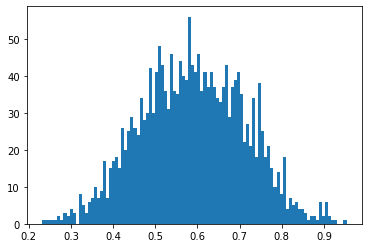

In [24]:
plt.hist(aucs_htom, bins=100)

In [25]:
aucs_mtoh=[]
for i in range(h_ranks.shape[0]):
    labels = np.zeros(top_in_m.shape[0])
    labels[top_in_m[i]] = 1
    aucs_mtoh.append(roc_auc_score(y_true=labels, y_score=h_ranks[i]))

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  6.,  1.,  0.,  1.,  2.,  5.,  2.,
        10.,  3.,  7.,  8.,  6.,  5.,  9., 16., 18., 17., 16., 16., 18.,
        17., 25., 23., 27., 27., 26., 33., 33., 34., 33., 29., 34., 39.,
        42., 34., 43., 45., 49., 44., 39., 33., 52., 39., 48., 44., 50.,
        48., 46., 44., 46., 40., 36., 40., 42., 40., 41., 29., 42., 28.,
        34., 31., 23., 25., 32., 19., 15., 17., 22., 14., 17.,  9.,  6.,
         6.,  3.,  6.,  3.,  6.,  6.,  8.,  0.,  2.,  2.,  4.,  4.,  1.,
         4.,  4.,  2.,  2.,  4.,  0.,  1.,  3.,  2.]),
 array([0.22745704, 0.23466495, 0.24187285, 0.24908076, 0.25628866,
        0.26349656, 0.27070447, 0.27791237, 0.28512027, 0.29232818,
        0.29953608, 0.30674399, 0.31395189, 0.32115979, 0.3283677 ,
        0.3355756 , 0.34278351, 0.34999141, 0.35719931, 0.36440722,
        0.37161512, 0.37882302, 0.38603093, 0.39323883, 0.40044674,
        0.40765464, 0.41486254, 0.42207045, 0.42927835, 0.43648625,
        0.44369416, 0.4509

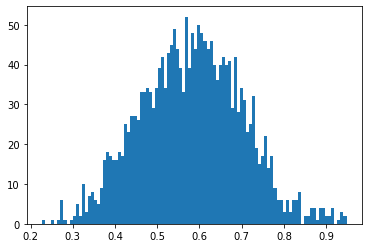

In [26]:
plt.hist(aucs_mtoh, bins=100)

In [27]:
gene_aucs = pd.DataFrame(index=mouse_genes.index, columns=['mouse_auc', 'human_auc'], data=np.array([aucs_mtoh, aucs_htom]).T)

In [28]:
gene_aucs

mouse_auc  human_auc
Gene                          
AAMP       0.644656   0.609424
AARSD1     0.476280   0.579742
AASDHPPT   0.376735   0.392818
ABCC5      0.431203   0.429957
ABCE1      0.576529   0.587259
...             ...        ...
ZNF800     0.460816   0.542165
ZNF830     0.561735   0.528299
ZNHIT1     0.488308   0.326838
ZRANB2     0.571048   0.739347
ZRSR2      0.475507   0.543162

[1970 rows x 2 columns]

In [29]:
gene_aucs.to_csv("../../data/aucs.tsv.gz", sep="\t")

In [30]:
from scipy.stats import spearmanr
spearmanr(gene_aucs.mouse_auc.values, gene_aucs.human_auc.values)

SpearmanrResult(correlation=0.7853314492955118, pvalue=0.0)

In [31]:
?roc_auc_score

Signature:
roc_auc_score(
    y_true,
    y_score,
    *,
    average='macro',
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
)
Docstring:
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from prediction scores.

Note: this implementation can be used with binary, multiclass and
multilabel classification, but some restrictions apply (see Parameters).

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
    True labels or binary label indicators. The binary and multiclass cases
    expect labels with shape (n_samples,) while the multilabel case expects
    binary label indicators with shape (n_samples, n_classes).

y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
    Target scores.

    * In the binary case, it corresponds to an array of shape
      `(n_samples,)`. Both probability estimates and non-thresholded
      dec